
# Project: Investigate a Dataset - [TMDb movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This project studies and reviews a dataset (tmdb-movies.csv) that contains nearly 10,000 movies-released from the year 1966 up to the year 2015- and their associated data which was collected from The Movie Database ([TMDB][1]), the project will focus on finding important relations and trends that result in movies having high ratings and high revenue while also answering some important answers about the dataset, the original dataset includes 20 columns which are:
>1. **id**: the id on the [TMDB][1] site.
2. **imdb_id**: the id on the [IMDb][2] site.
3. **popularity**: the current movie popularity on the [TMDB][1] site.
4. **budget**: the movie’s cost of production.
5. **revenue**: the total income of the movie.
6. **original_title**: the movie’s title on release.
7. **cast**: the actors taking a role in the movie.   
8. **homepage**: the movie’s official online page.  
9. **director**: the movie’s director during production.
10. **tagline**: a slogan that captures the movie’s experience.
11. **keywords**: certain words that are associated with the movie’s experience.
12. **overview**: the movie’s description.
13. **genres**: the category of which the movie aligns itself with.
14. **production_companies**: the companies responsible for the movies production and release
15.	**release_date**: the date on which the movie got released.
16. **vote_count**: the amount of votes on the [TMDB][1] site.
17. **vote_average**: the average vote ratings on the [TMDB][1] site.
18. **release_year**: the year in which the movie got released. 
19. **budget_adj**: the amount of money that was required for the movie’s release adjusted for inflation.
20. **revenue_adj**: the amount of revenue money the movie garnered adjusted for inflation.

Some of these columns like the tagline columns is ignored in the analysis process as it provides no important data that affects obtaining conclusions from the data.

[1]:https://www.themoviedb.org/
[2]:https://www.imdb.com/

### Question(s) for Analysis

In order to analyze the dataset and obtain useful information from it we have to ask a few questions whose answers will offer us some guidance to better understand the data and how each value correlate to one another, the questions we are going to answer are the following
>* Q1: What are the properties associated with high revenue movies?
* Q2: Who are the actors with the highest revenue and ratings?
* Q3: What are the most popular movie genres being released  across each decade?


To answer these questions, first we have to clean our data and make sure its convenient for analysis.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# % matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

The data wrangling process will include a lot of assumptions and operations, but first we have to gain a general idea about our data that will help in defining the dataset  like the shape, data types and number of missing values, after exploring our dataset we will then have enough understating to start the cleaning process 

In [5]:
# The first and easiest step is to load the data and see the column headers and how values are documented
df = pd.read_csv('../Data_files/tmdb-movies.csv')
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [6]:
# Then we look for the datatypes and missing data for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [7]:
# checking the shape after first loading the database for further reference later on
df.shape

(10866, 21)

In [8]:
# althogh its not going to be usefuel right now but gaining idea about the data can be usefull later on
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



### Data Cleaning

In order to make the data suitable for analysis we will have to edit it, the first and most important step of cleaning a datatset is removing unnescessary data such as columns that we won't be doing operations on and duplicates, then we get rid of the NaN values in a way that is suitable so we can finally move to the final step which is sorting data the way we need it to perform proper analysis.

In [9]:
# First thing in the cleaning process is to check for duplicate rows and remove them if they exist
print(sum(df.duplicated()))
df.drop_duplicates(inplace = True)
sum(df.duplicated())

1


0

In [10]:
# Next step in the cleaning process is to drop some unneeded columns(id,imdb_id,homepage,tagline,overview,keywords)
#  as they won't be useful for the data aalysis
df.drop(['id','imdb_id','homepage','tagline','overview','keywords'],axis = 1, inplace = True)
df.head(1)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [11]:
# Now we check again for what columns have missing data and determine how to fix them
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10865 non-null  float64
 1   budget                10865 non-null  int64  
 2   revenue               10865 non-null  int64  
 3   original_title        10865 non-null  object 
 4   cast                  10789 non-null  object 
 5   director              10821 non-null  object 
 6   runtime               10865 non-null  int64  
 7   genres                10842 non-null  object 
 8   production_companies  9835 non-null   object 
 9   release_date          10865 non-null  object 
 10  vote_count            10865 non-null  int64  
 11  vote_average          10865 non-null  float64
 12  release_year          10865 non-null  int64  
 13  budget_adj            10865 non-null  float64
 14  revenue_adj           10865 non-null  float64
dtypes: float64(4), int6

In [12]:
# it appears we have some movies without genres which isn't possible
# so we find the number of movies with no genres and remove them
df[df['genres'].isnull()].head()
#it appears that most of these movies have alot of missing data so removing them completely would be useful

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
424,0.244648,0,0,Belli di papÃ,Diego Abatantuono|Matilde Gioli|Andrea Pisani|...,Guido Chiesa,100,NaN,NaN,10/29/15,21,6.1,2015,0.0,0.0
620,0.129696,0,0,All Hallows' Eve 2,NaN,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,90,NaN,Ruthless Pictures|Hollywood Shorts,10/6/15,13,5.0,2015,0.0,0.0
997,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,Steward Lee|Steven G. Lee,44,NaN,NaN,10/3/14,13,6.8,2014,0.0,0.0
1712,0.302095,0,0,Prayers for Bobby,Ryan Kelley|Sigourney Weaver|Henry Czerny|Dan ...,Russell Mulcahy,88,NaN,Daniel Sladek Entertainment,2/27/09,57,7.4,2009,0.0,0.0
1897,0.020701,0,0,Jonas Brothers: The Concert Experience,Nick Jonas|Joe Jonas|Kevin Jonas|John Lloyd Ta...,Bruce Hendricks,76,NaN,NaN,2/27/09,11,7.0,2009,0.0,0.0


In [13]:
# now we select the whole dataframe without the parts that contain NAn values inn the genre column
df = df[df['genres'].notna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10842 non-null  float64
 1   budget                10842 non-null  int64  
 2   revenue               10842 non-null  int64  
 3   original_title        10842 non-null  object 
 4   cast                  10767 non-null  object 
 5   director              10800 non-null  object 
 6   runtime               10842 non-null  int64  
 7   genres                10842 non-null  object 
 8   production_companies  9826 non-null   object 
 9   release_date          10842 non-null  object 
 10  vote_count            10842 non-null  int64  
 11  vote_average          10842 non-null  float64
 12  release_year          10842 non-null  int64  
 13  budget_adj            10842 non-null  float64
 14  revenue_adj           10842 non-null  float64
dtypes: float64(4), int6

In [14]:
df.shape

(10842, 15)

In [15]:
# So it appears that some movies have no production companis which may not make alot of sense
#  but since they make up about 1000 movies removing them would compromise the validty of the data sets
# and the only categories with NaN values are (production_companies, director, cast)
# In order to handle this issue without deleting alot of rows a safe assumption is made
#  which is replacing these NaN values with a None string
df.fillna('None',inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10842 non-null  float64
 1   budget                10842 non-null  int64  
 2   revenue               10842 non-null  int64  
 3   original_title        10842 non-null  object 
 4   cast                  10842 non-null  object 
 5   director              10842 non-null  object 
 6   runtime               10842 non-null  int64  
 7   genres                10842 non-null  object 
 8   production_companies  10842 non-null  object 
 9   release_date          10842 non-null  object 
 10  vote_count            10842 non-null  int64  
 11  vote_average          10842 non-null  float64
 12  release_year          10842 non-null  int64  
 13  budget_adj            10842 non-null  float64
 14  revenue_adj           10842 non-null  float64
dtypes: float64(4), int6

In [16]:
# next thing we need to check is the amout of unique genres there is
df['genres'].nunique()

2039

In [17]:
# Since having nearly 2000 genres isn't possible we will have to explode the dataframe
#  and have each movie fall into various genres
df_genres = df.assign(genres=df['genres'].str.split('|')).explode('genres')
df_genres.head(1)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [18]:
# Now we check again to see if the problem was fixed
df_genres['genres'].nunique()

20

In [19]:
# after fixing the amount of genres we will do the same with the cast
df['cast'].nunique()

10698

In [20]:
df_cast = df.assign(cast=df['cast'].str.split('|')).explode('cast')
df_cast.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,32.985763,150000000,1513528810,Jurassic World,Bryce Dallas Howard,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,32.985763,150000000,1513528810,Jurassic World,Irrfan Khan,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,32.985763,150000000,1513528810,Jurassic World,Vincent D'Onofrio,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,32.985763,150000000,1513528810,Jurassic World,Nick Robinson,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [21]:
df_cast['cast'].nunique()

18984

In [22]:
# it seems that we are missing a column that determines the decade in which the movie was made 
#  so we will have to add one to all of our datasets
bin_names = ['1960s' ,'1970s' ,'1980s' ,'1990s','2000s','2010s' ]
bin_edges = [1959 ,1969 ,1979 ,1989 ,1999,2009 , 2019]
df['decades'] =pd.cut(df['release_year'], bin_edges, labels=bin_names)
df_genres['decades'] =pd.cut(df['release_year'], bin_edges, labels=bin_names)
df_cast['decades'] =pd.cut(df['release_year'], bin_edges, labels=bin_names)
df.head(1)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,decades
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,2010s


<a id='eda'></a>
## Exploratory Data Analysis

Ivestigation of the data will follow the same sequence of steps each time, first step is definig the data we need and next step is viewing the data it in a neat undersatble way and so that finally we can view the results using visual aids which will help us draw conclusions.

### Research Question 1 ( What are the properties associated with high revenue movies?)

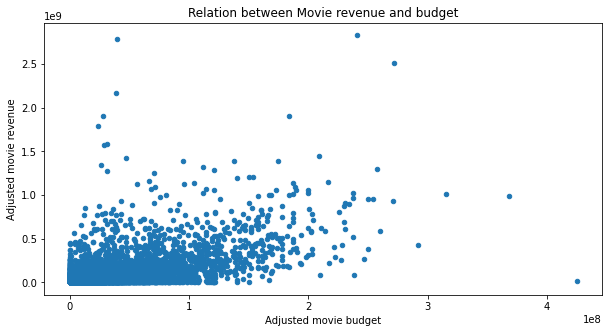

In [23]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
# First aspect we will ispect is how much a movie's budget affects its revenue 
df.plot(x='budget_adj',y='revenue_adj',kind='scatter',figsize=(10,5))
plt.xlabel('Adjusted movie budget')
plt.ylabel('Adjusted movie revenue')
plt.title('Relation between Movie revenue and budget');

In [24]:
# It appears from the graph that how much money is spent in production doesn't really affect
#  how much money it's going to mkae in comparison

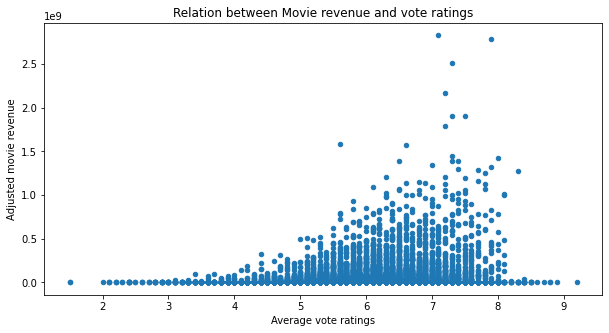

In [25]:
# Next we check on how the movie ratings associate with high revenue movies
df.plot(x='vote_average',y='revenue_adj',kind='scatter',figsize=(10,5))
plt.xlabel('Average vote ratings')
plt.ylabel('Adjusted movie revenue')
plt.title('Relation between Movie revenue and vote ratings');

In [26]:
# It appears that audience reception is directly proportional to how much the movie's revenue is
#  as it shows from the graph except for the presence of some outlier points which can be ignored

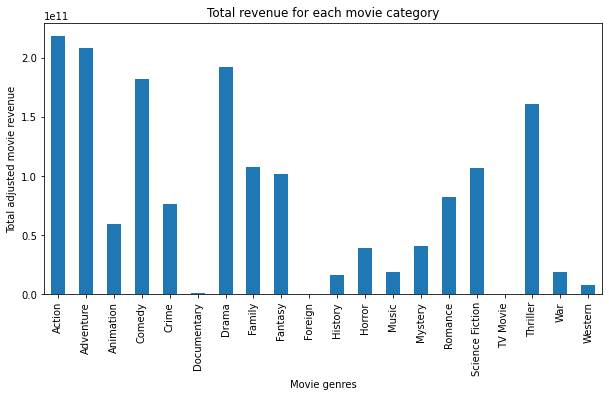

In [27]:
# Now we chech how much total revenue did each genre generate 
# this is not really accurate tho as one movie can fall in a number of categories
df_genres.groupby('genres')['revenue_adj'].sum().plot(kind ='bar',figsize=(10,5))
plt.xlabel('Movie genres')
plt.ylabel('Total adjusted movie revenue')
plt.title('Total revenue for each movie category');

In [28]:
# so it appears that the highest 3 genres in term of total revenue are Action, Adventure and Drama

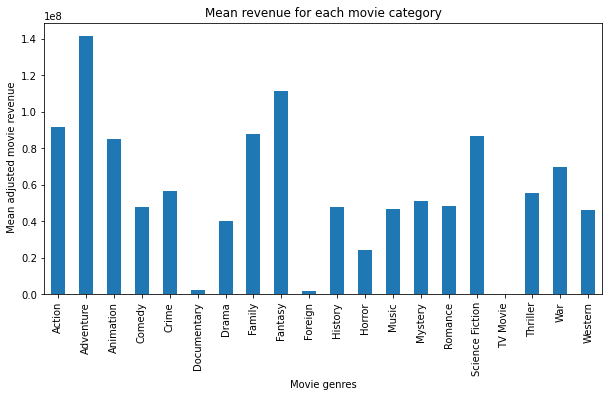

In [29]:
# again we do the same but instead we will see the average revenue that each genre generated 
df_genres.groupby('genres')['revenue_adj'].mean().plot(kind ='bar',figsize=(10,5))
plt.xlabel('Movie genres')
plt.ylabel(' Mean adjusted movie revenue')
plt.title('Mean revenue for each movie category');

In [30]:
# We conclude that on average the genres that produce the most revenue are Adventure, Action and Fantasy

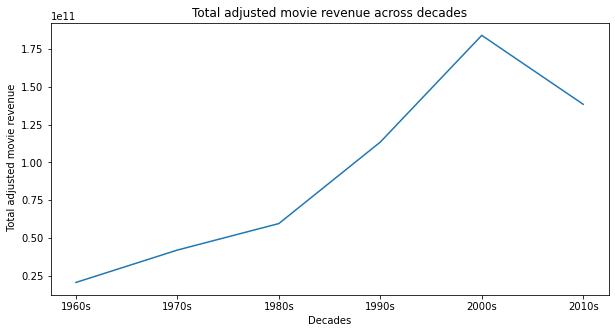

In [31]:
# Now check how the passing of decades affected the total revnue 
df.groupby('decades')['revenue_adj'].sum().plot(kind ='line',figsize=(10,5))
plt.xlabel('Decades')
plt.ylabel(' Total adjusted movie revenue')
plt.title('Total adjusted movie revenue across decades');

In [32]:
# It appears that as time goes on movies generate more revenue each decade except for the 2010s
#  but that can be explained by our dataset containing movies upto 2015 only

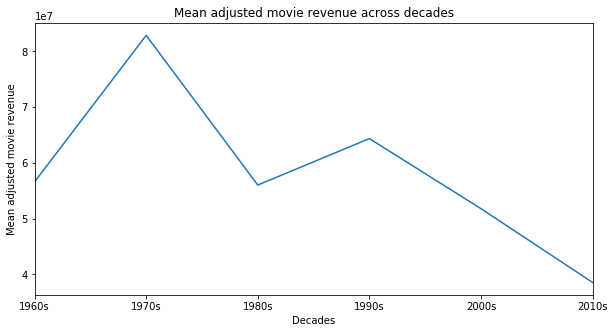

In [32]:
# again we do the same but for the average movie revenue
df.groupby('decades')['revenue_adj'].mean().plot(kind ='line',figsize=(10,5))
plt.xlabel('Decades')
plt.ylabel('Mean adjusted movie revenue')
plt.title('Mean adjusted movie revenue across decades');

In [33]:
# so it appears that back then each movie used to generate more money than it does now

### Research Question 2  (Who are the actors with the highest revenue and ratings?)

In [34]:
# to find out who are the actors associated with high revenue movie 
#  we create a series containing both and arrange it accordingly
Actor_Total_movie_revenue = df_cast.groupby('cast')['revenue_adj'].sum()
Actor_Total_movie_revenue

cast
 Larry Mullen Jr.                     0.000000e+00
 Nicole MuÃ±oz                        0.000000e+00
 Therese Giehse                       0.000000e+00
"Weird Al" Yankovic                   0.000000e+00
50 Cent                               3.297951e+08
                                          ...     
Ã€lex Monner                          0.000000e+00
Äá»— Thá»‹ Háº£i Yáº¿n                3.354827e+07
Å arÅ«nas Bartas                      0.000000e+00
à¸ªà¸£à¸žà¸‡à¸©à¹Œ à¸Šà¸²à¸•à¸£à¸µ    9.050933e+06
é‚±æ·‘è²ž                             0.000000e+00
Name: revenue_adj, Length: 18984, dtype: float64

In [35]:
Actor_Total_movie_revenue.sort_values(ascending=False)[:10]
# That gives us the top 10 actors with the highest revenues

cast
Harrison Ford       1.468348e+10
Tom Cruise          1.121280e+10
Tom Hanks           1.067239e+10
Emma Watson         8.806337e+09
Ian McKellen        8.671323e+09
Eddie Murphy        8.572390e+09
Johnny Depp         8.564524e+09
Daniel Radcliffe    8.515082e+09
Rupert Grint        8.358390e+09
Bruce Willis        8.253051e+09
Name: revenue_adj, dtype: float64

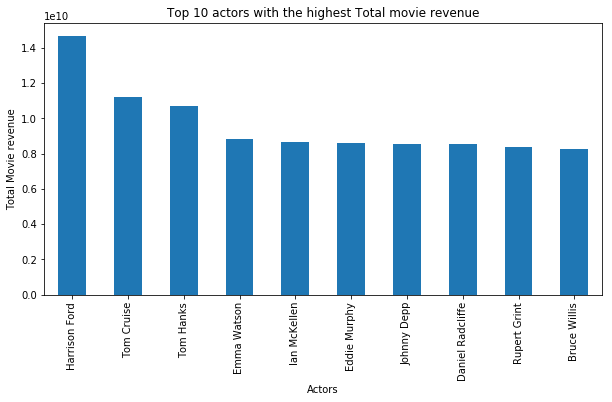

In [36]:
Actor_Total_movie_revenue.sort_values(ascending=False)[:10].plot(kind='bar',figsize=(10,5))
plt.xlabel('Actors')
plt.ylabel('Total Movie revenue')
plt.title('Top 10 actors with the highest Total movie revenue');

In [37]:
# maybe doing the same for the movie ratings will give us an insight to which actors are fan favourites
Actor_movie_revenue.sort_values(ascending=False)[:10].plot(kind='bar',figsize=(10,5))
plt.xlabel('Actors')
plt.ylabel('Total Movie revenue')
plt.title('Top 10 actors with the highest Total movie revenue');

NameError: name 'Actor_movie_revenue' is not defined

In [ ]:
Actor_movie_score = df_cast.groupby('cast')['vote_average'].mean()
Actor_movie_score

In [38]:
Actor_movie_score.sort_values(ascending=False)[:10]

NameError: name 'Actor_movie_score' is not defined

In [39]:
# This isn't as useful as it seems as these actors probably viewed in one or two high rated movies so we will just ignore it

### Research Question 3 (What are the most popular movie genres being released across each decade?)`

**In order to answer this question, we will have create a dataframe that contains all the movie genres and the decade in which they got released in and from there we can just group them by each decade and present the data in a neat graph.

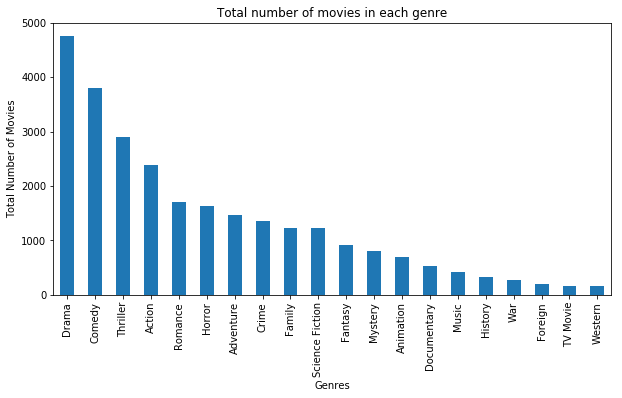

In [40]:
df_genres['genres'].value_counts().plot(kind = 'bar',figsize=(10,5))
plt.xlabel('Genres')
plt.ylabel('Total Number of Movies')
plt.title('Total number of movies in each genre');

In [41]:
Genre = df_genres.groupby('decades')['genres'].value_counts()

In [42]:
# we will just start from the 1960s until we reach the 2010s
Genre['1960s']

genres
Drama              168
Comedy             113
Action              78
Romance             67
Adventure           64
Thriller            64
Horror              47
Crime               43
Family              39
Western             36
Science Fiction     34
Mystery             32
History             31
War                 31
Fantasy             23
Music               21
Animation           16
Foreign              9
Documentary          2
TV Movie             2
Name: genres, dtype: int64

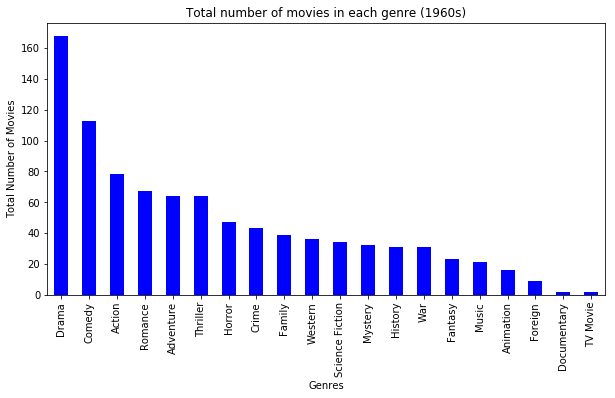

In [43]:
Genre['1960s'].plot(kind='bar',color ='blue',figsize=(10,5))
plt.xlabel('Genres')
plt.ylabel('Total Number of Movies')
plt.title('Total number of movies in each genre (1960s)');

In [44]:
Genre['1970s']

genres
Drama              239
Thriller           148
Comedy             122
Action             121
Horror             104
Crime               83
Adventure           77
Science Fiction     77
Mystery             56
Romance             51
Family              39
Western             36
Fantasy             30
Music               25
War                 25
History             23
Animation           17
Documentary         13
TV Movie             8
Foreign              3
Name: genres, dtype: int64

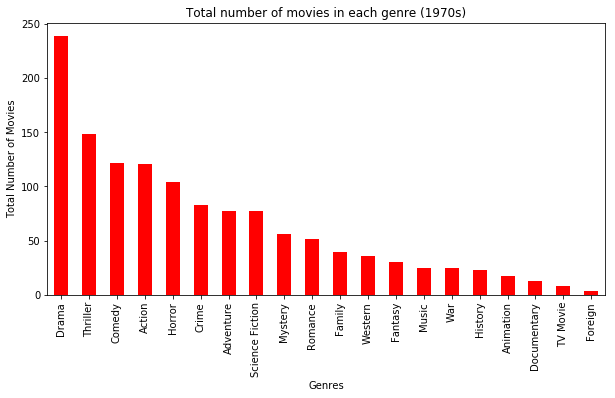

In [45]:
Genre['1970s'].plot(kind='bar',color ='red',figsize=(10,5))
plt.xlabel('Genres')
plt.ylabel('Total Number of Movies')
plt.title('Total number of movies in each genre (1970s)');

In [46]:
Genre['1980s']

genres
Comedy             428
Drama              423
Action             272
Thriller           260
Horror             221
Adventure          175
Romance            175
Science Fiction    172
Crime              153
Fantasy            123
Family             105
Mystery             72
Music               52
Animation           38
History             33
War                 32
Western             14
Documentary         13
TV Movie             9
Foreign              8
Name: genres, dtype: int64

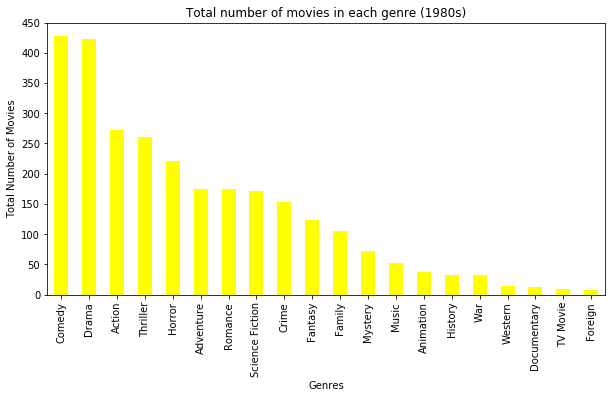

In [47]:
Genre['1980s'].plot(kind='bar',color ='yellow',figsize=(10,5))
plt.xlabel('Genres')
plt.ylabel('Total Number of Movies')
plt.title('Total number of movies in each genre (1980s)');

In [48]:
Genre['1990s']

genres
Drama              862
Comedy             737
Thriller           495
Action             455
Romance            341
Adventure          275
Family             273
Crime              270
Science Fiction    211
Horror             189
Fantasy            188
Mystery            148
Animation           79
History             53
Music               49
Foreign             32
War                 29
Western             25
Documentary         23
TV Movie            19
Name: genres, dtype: int64

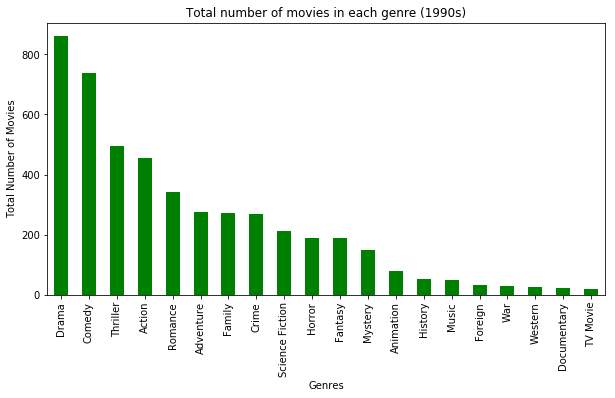

In [49]:
Genre['1990s'].plot(kind='bar',color ='green',figsize=(10,5))
plt.xlabel('Genres')
plt.ylabel('Total Number of Movies')
plt.title('Total number of movies in each genre (1990s)');

In [50]:
Genre['2000s']

genres
Drama              1615
Comedy             1354
Thriller            975
Action              780
Romance             633
Adventure           506
Horror              484
Family              471
Crime               466
Science Fiction     371
Fantasy             320
Animation           296
Mystery             283
Documentary         144
Music               121
History             115
Foreign             103
War                  88
TV Movie             53
Western              26
Name: genres, dtype: int64

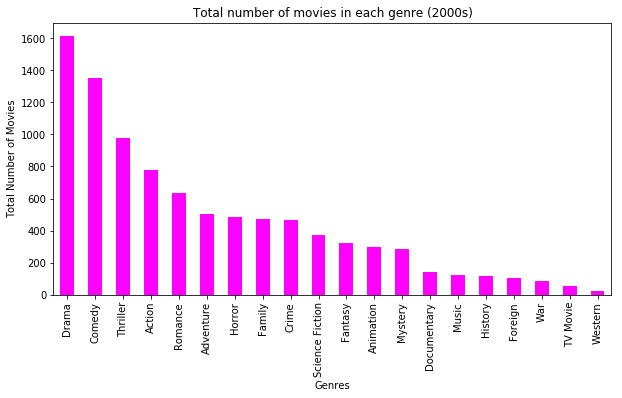

In [51]:
Genre['2000s'].plot(kind='bar',color ='magenta',figsize=(10,5))
plt.xlabel('Genres')
plt.ylabel('Total Number of Movies')
plt.title('Total number of movies in each genre (2000s)');

In [52]:
Genre['2010s']

genres
Drama              1453
Comedy             1039
Thriller            965
Action              678
Horror              592
Romance             445
Adventure           374
Science Fiction     364
Crime               339
Documentary         325
Family              304
Animation           253
Fantasy             232
Mystery             219
Music               140
History              79
TV Movie             76
War                  65
Foreign              33
Western              28
Name: genres, dtype: int64

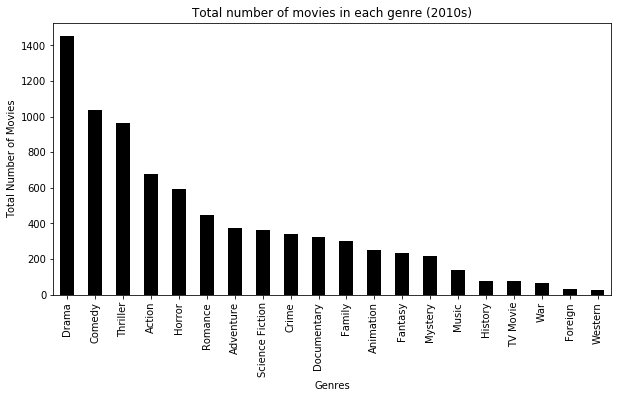

In [53]:
Genre['2010s'].plot(kind='bar',color ='black',figsize=(10,5))
plt.xlabel('Genres')
plt.ylabel('Total Number of Movies')
plt.title('Total number of movies in each genre (2010s)');

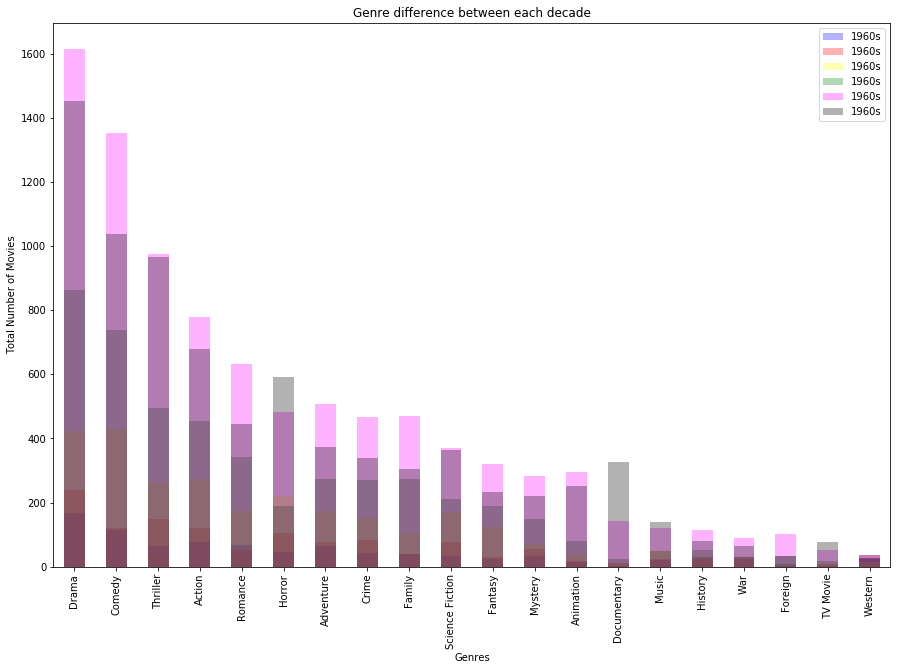

In [54]:
# this sequence will return a graph that shows the number of all the genres released across all decades 
# so they can be compared 
Genre_order = ["Drama", "Comedy", "Thriller", "Action","Romance","Horror","Adventure","Crime",
             "Family","Science Fiction","Fantasy","Mystery","Animation","Documentary","Music","History","War","Foreign",
            "TV Movie","Western"]
colour = ['blue','red','yellow','green','magenta','black']
decade = ['1960s', '1970s', '1980s', '1990s','2000s', '2010s']
n = 0
for i in decade:
    Genre[i].loc[Genre_order].plot(kind='bar',color = colour[n],label ='1960s',alpha = 0.3,figsize=(15,10))
    n += 1 
plt.xlabel('Genres')
plt.ylabel('Total Number of Movies')
plt.title('Genre difference between each decade');
plt.legend();

        

**it is clear that the drama genre is the most being produced acroos all decades

<a id='conclusions'></a>
## Conclusions

Now that we finally have our data viewd and analysed we can safely make our conclusions regarding the data gives, these 3 conclusions are based on the 3 questions we asked.


From the graphs and data that answered our first question we can determine some aspects associated with high revenue movies, a high revenue movie will generally have a high vote rating among the audience and will probably fall in the Action|Adventure genre of movies, and while not being the most important aspect, having a suitable budget for the fil will help get decent revenue for the movie.

Moving on to the actor department, we can safley assume that a well known actor will almost always be tied with high revenue movies while other less famous actors will have higher average rating movies, this result offers limited view as the number of movies a famous actor performs in is greatly larger than those of less famous actors and will most likely affect the average rating of the movies they act in.

The last question allows us to see the trend in genres being producd for each decade in which we can clearly see that the Drame, Action, Comedy and thriller movies are amongst the most popular genres being produced across all decades.

>Although the drama genre is the most genre being produced across all decades it is not the highest grossing genre in term of total revenue or mean revenue

### Limitations

Although the data we are gives is quite rich in certain details, it has its backdraws, the first thing that needs to be addressed is the presence of alot of 0 values in the Budget crieteria which simply can't be possible for movie production and also the abundance of NaN values in the production company criteria, the second thing is that while we were able to get the average movie rating for each actor, it really does't determine how good the actor is or his ratings as it just shows us the average rating of the movies they acted in, the third limitation met was the presence of the popularity criteria and while it can be usefull for analysis it does't really determine the popularity of each movie on its time of release  but the the movie's current popularity at this certain moment.

 

In [55]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0